# Churchland Widefield Data

This notebook demonstrates:
- Decoding L/R choice from different periods of the delay period

Run this with access to the engram

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from LearningSession import *
from LearningPsychometricPredictor import *

# Single Session

## 0. Specify the mouse and session date you are looking at

In [2]:
mouse = "mSM63"
days = os.listdir("/home/chingf/engram/data/musall/learning/neural/mSM63")
days = [d for d in days if "2018" in d]
days.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

## 1A. Load data

In [3]:
# Plotting p(right) over discrimination given previous choice
def plot_psychometric_curve(result):
    model = result['model']
    data_prevl = []
    data_prevr = []
    for delta in range(-35,36):
        data_prevl.append([0,delta])
        data_prevr.append([1,delta])
    data_prevl = np.array(data_prevl)
    data_prevr = np.array(data_prevr)
    psychometric_curve_prevl = model.predict_proba(data_prevl)
    psychometric_curve_prevr = model.predict_proba(data_prevr)
    plt.plot(
        range(-35, 36),
        psychometric_curve_prevl[:,1], color="blue",
        label="Previous Choice Left"
        )
    plt.plot(
        range(-35, 36),
        psychometric_curve_prevr[:,1], color="red",
        label="Previous Choice Right"
        )
    plt.title("Probability of Choosing Right")
    plt.legend()
    plt.xlabel("More Left Beeps >>> More Right Beeps")
    plt.show()

In [23]:
# Plotting p(right) over discrimination given audition
def plot_audit_psychometric_curve(result):
    model = result['model']
    array_names = [
        "Auditory; Prev L",
        "Auditory; Prev R",
        "Tactile; Prev L",
        "Tactile; Prev R"
        ]
    plot_style = ["-b", "-r", "--b", "--r"]
    data_arrays = [[] for _ in range(len(array_names))]
    for delta in range(-35,36):
        data_arrays[0].append([0,delta,1])
        data_arrays[1].append([1,delta,1])
        data_arrays[2].append([0,delta,0])
        data_arrays[3].append([1,delta,0])
    data_arrays = [
        np.array(d) for d in data_arrays
        ]
    psycurves = [
        model.predict_proba(d) for d in data_arrays
        ]
    plt.figure()
    for i in range(len(array_names)):
        plt.plot(
            range(-35, 36),
            psycurves[i][:,1], plot_style[i],
            label=array_names[i]
            )
    plt.title("Probability of Choosing Right")
    plt.legend()
    plt.xlabel("More Left Beeps >>> More Right Beeps")
    plt.show()

In [7]:
#### Load Session
results = []
for day in days[30:40]:
    print(day)
    session = LearningSession(mouse, day, access_engram=True)
    predictor = LRPsychometric(session)
    r = predictor.fit()
    results.append(r)

20-Jul-2018
23-Jul-2018
24-Jul-2018
25-Jul-2018
26-Jul-2018
27-Jul-2018
30-Jul-2018
31-Jul-2018
01-Aug-2018
02-Aug-2018


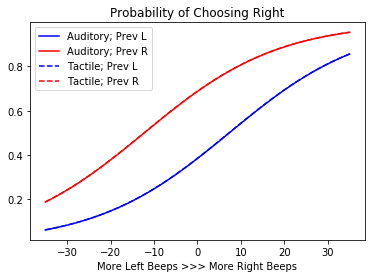

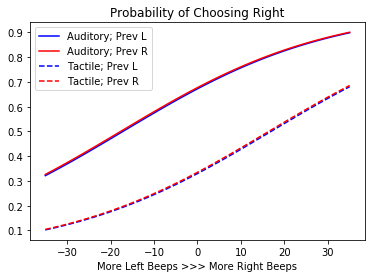

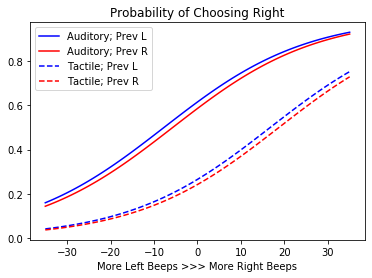

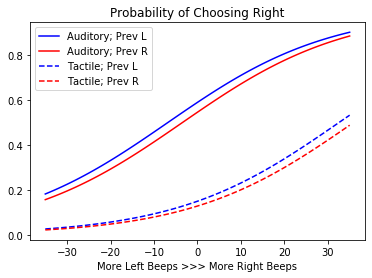

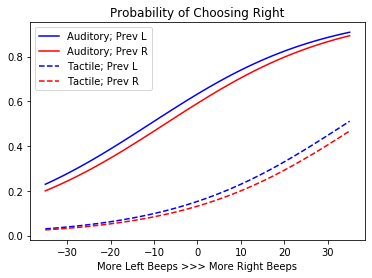

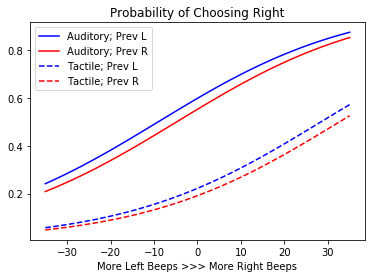

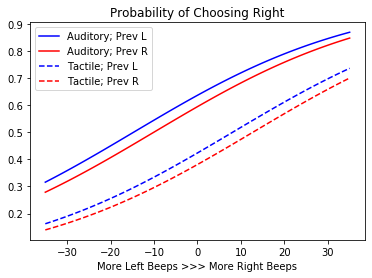

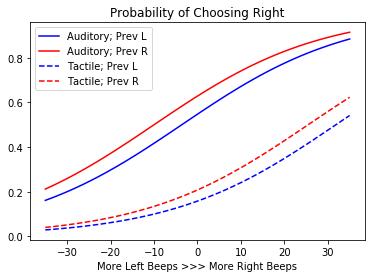

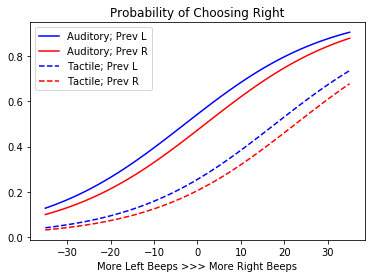

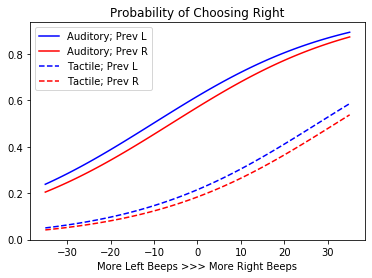

In [24]:
for result in results:
    plot_audit_psychometric_curve(result)

In [25]:
for result in results:
    print(result['score'])

0.702261420171868
0.6690104879160967
0.757760453579022
0.7571982281284606
0.7468232460102379
0.74070987654321
0.6506238859180036
0.7450162284972411
0.7192283950617284
0.7639498432601881


In [21]:
# Plotting GLM weights
def plot_glm_weight(results):
    #plt.figure()
    for result in results:
        plt.figure()
        coefs = [
            result['model'].coef_[0,0],
            result['model'].coef_[0,1],
            result['model'].intercept_[0]
            ]
        plt.plot(coefs)
        plt.title("GLM Weights")
        plt.xticks(np.arange(3), ["Prev Choice", "Delta", "Bias"])
        plt.show()
            
# Plotting GLM weights
def plot_glm_weight_audit(results):
    #plt.figure()
    for result in results:
        plt.figure()
        coefs = [
            result['model'].coef_[0,0],
            result['model'].coef_[0,1],
            result['model'].coef_[0,2],
            result['model'].intercept_[0]
            ]
        plt.plot(coefs)
        plt.title("GLM Weights")
        plt.xticks(np.arange(4), ["Prev Choice", "Delta", "Is Auditory", "Bias"])
        plt.show()

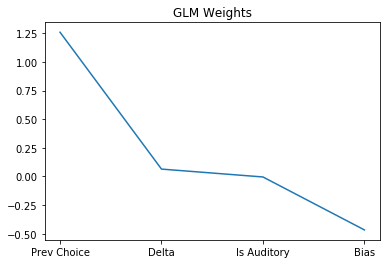

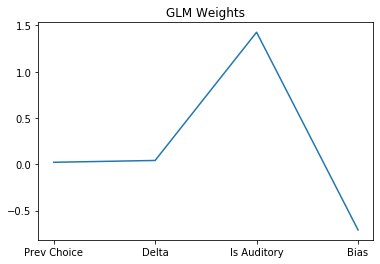

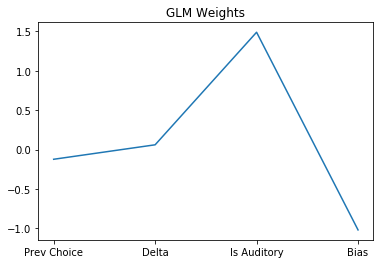

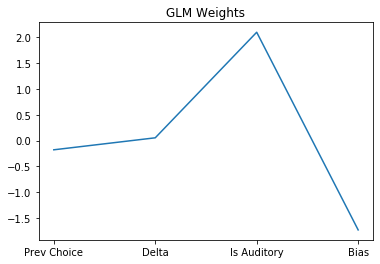

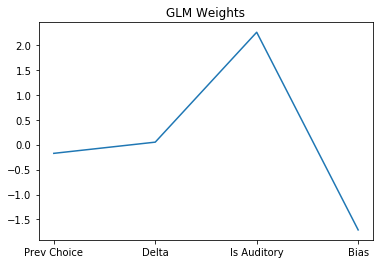

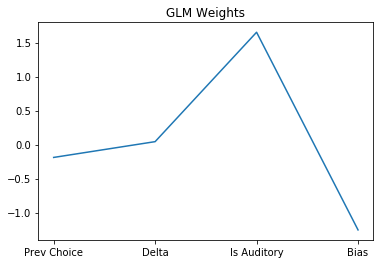

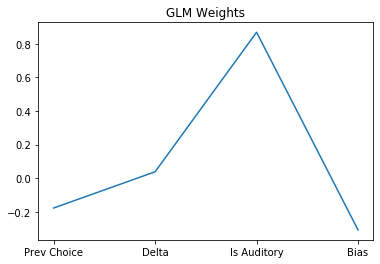

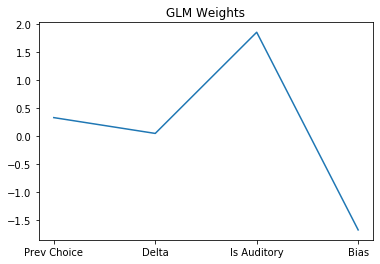

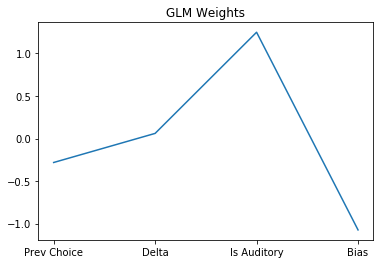

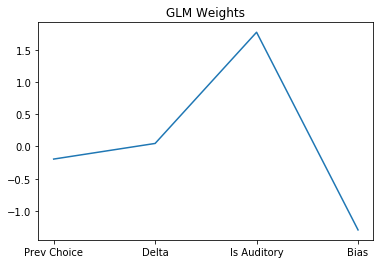

In [22]:
plot_glm_weight_audit(results)